# ODE Boundary Value Problems

# The Shooting Method

The shooting method solves boundary value problems (BVP) using initial value problem (IVP) solution methods and an initial guess of the derivative at the initial value of one side. This process then solves over to the other boundary value. The newly calculated boundary value is then checked against the desired boundary value. A second initial guess of the derivative is tried and a second solution over to the boundary value is performed. These values are then used to create a linear interpolation to find the desired value.

## General formulation

### Boundary Value Problem

$$\frac{d^2y}{dx^2}=f(x,y,\frac{dy}{dx})$$

$$y(a)=y_a, \space \space \space \space y(b)=y_b$$

### Equavalent Initial Value Problem

$$y(a)=y_a, \space \space \space \space y'(a)=Y_a$$

where the value of $Y_a$ is a guess. This guess is used to solve for $y(b)=p$ where $p$ is the boundary calculated with the guess value. If $p$ is equal to $y_b$ then the calculation would end. However this is improbable. Therefore we would make a second guess we will call $Z_a$, so setting $y'(a)=Z_a$ we will solve and find a second value of $y(b)$ we will call $q$, therefore $y(b)=q$.

These calculated values of $p$ and $q$ can be used to solve for the actual value of $y'(a)$ to satisfy $y(b)=y_b$ with linear interpolation. This interpolated value of $y'(a)$ is then used to solve the problem.

## Example

$$\frac{d^2y}{dx^2}-2y=8x(9-x)$$

$$y(0)=0, \space \space \space \space y(9)=0$$

### Rearrange

$$\frac{d^2y}{dx^2}=2y+8x(9-x)$$

### Redefine as two first order ODEs

$$\frac{dy}{dx}=z=f_1(x,y,z)$$

$$\frac{dz}{dx}=2y+8x(9-x)=f_2(x,y,z)$$

$$y(0)=0$$

### Create an initial guess at derivative at $x=0$.

$$z(0)=\frac{dy}{dx}=4 \space \space (guess)$$ 

### Create functions

In [1]:
def f1(x,y,z): return z
def f2(x,y,z): return 2*y+8*x*(9-x)

### Define initial conditions and step size

In [2]:
x0 = 0
y0 = 0
z0 = 4 #Y_a which is a guess value
Y_a = z0
h = 3       #This is defined by the user
import pandas as pd
df = pd.DataFrame({'x':[x0],'y':[y0],'z':z0})
df

,x,y,z
0,0,0,4


### Perform first step calculation

$$x_1=x_0+h$$

$$y_1=y_0+f_1(x_0,y_0,z_0)h$$

$$z_1=z_0+f_2(x_0,y_0,z_0)h$$


In [3]:
x1 = x0+h
y1 = y0+f1(x0,y0,z0)*h
z1 = z0+f2(x0,y0,z0)*h

df = df.append({'x':x1,'y':y1,'z':z1},ignore_index=True)
df

,x,y,z
0,0,0,4
1,3,12,4


In [4]:
x2 = x1+h
y2 = y1+f1(x1,y1,z1)*h
z2 = z1+f2(x1,y1,z1)*h
df = df.append({'x':x2,'y':y2,'z':z2},ignore_index=True)
df

,x,y,z
0,0,0,4
1,3,12,4
2,6,24,508


In [5]:
x3 = x2+h
y3 = y2+f1(x2,y2,z2)*h
z3 = z2+f2(x2,y2,z2)*h
p = y3
df = df.append({'x':x3,'y':y3,'z':z3},ignore_index=True)
df

,x,y,z
0,0,0,4
1,3,12,4
2,6,24,508
3,9,1548,1084


### Initial results
At $x=9$, $y(9)=1548=p$ which is not $y(9)=0$. Therefore create a second guess of the derivative, let $z_0=-24$.

In [6]:
x0 = 0
y0 = 0
z0 = -24 #Z_a
Z_a = z0
h = 3       #This is defined by the user
df = pd.DataFrame({'x':[x0],'y':[y0],'z':z0})
df

,x,y,z
0,0,0,-24


In [7]:
x1 = x0+h
y1 = y0+f1(x0,y0,z0)*h
z1 = z0+f2(x0,y0,z0)*h
df = df.append({'x':x1,'y':y1,'z':z1},ignore_index=True)
df

,x,y,z
0,0,0,-24
1,3,-72,-24


In [8]:
x2 = x1+h
y2 = y1+f1(x1,y1,z1)*h
z2 = z1+f2(x1,y1,z1)*h
df = df.append({'x':x2,'y':y2,'z':z2},ignore_index=True)
df

,x,y,z
0,0,0,-24
1,3,-72,-24
2,6,-144,-24


In [9]:
x3 = x2+h
y3 = y2+f1(x2,y2,z2)*h
z3 = z2+f2(x2,y2,z2)*h
q = y3
df = df.append({'x':x3,'y':y3,'z':z3},ignore_index=True)
df

,x,y,z
0,0,0,-24
1,3,-72,-24
2,6,-144,-24
3,9,-216,-456


### Second guess results
At $x=9$, $y(9)=-216=q$ which is not $y(9)=0$. Therefore perform an interpolation to find the actual value of the derivative.

### Interpolation

$$y'(a) = Y_a+\frac{Y_a-Z_a}{p-q}(p_{des}-p)$$

In [10]:
pdes = 0

yprime = Y_a+((Y_a-Z_a)/(p-q))*(pdes-p)
yprime

-20.57142857142857

In [11]:
x0 = 0
y0 = 0
z0 = yprime
Z_a = z0
h = 3       #This is defined by the user
df = pd.DataFrame({'x':[x0],'y':[y0],'z':z0})
df

,x,y,z
0,0,0,-20.571429


In [12]:
x1 = x0+h
y1 = y0+f1(x0,y0,z0)*h
z1 = z0+f2(x0,y0,z0)*h
df = df.append({'x':x1,'y':y1,'z':z1},ignore_index=True)
df

,x,y,z
0,0.0,0.000000,-20.571429
1,3.0,-61.714286,-20.571429


In [164]:
x2 = x1+h
y2 = y1+f1(x1,y1,z1)*h
z2 = z1+f2(x1,y1,z1)*h

df = df.append({'x':x2,'y':y2,'z':z2},ignore_index=True)
df

,x,y,z
0,0.0,0.000000,-20.571429
1,3.0,-61.714286,-20.571429
2,6.0,-123.428571,41.142857


In [13]:
x3 = x2+h
y3 = y2+f1(x2,y2,z2)*h
z3 = z2+f2(x2,y2,z2)*h
q = y3
df = df.append({'x':x3,'y':y3,'z':z3},ignore_index=True)
df

,x,y,z
0,0.0,0.000000,-20.571429
1,3.0,-61.714286,-20.571429
2,9.0,-216.000000,-456.000000


### Results
It can be seen that $y(9)=0$ or sufficiently close. Therefore the equation is solved.

## Example using solve_bvp function

## $$ y''+ke^y=0$$

## $$y(0)=y(1)=0$$

Assume $k=1$.

First we need to rewrite the equation as a system of two first order equations.

## $$y_1'=y_2 $$

## $$y_2'=-e^{y_1}$$

### Define the function

In [36]:
import numpy as np

In [56]:
def fun(x,y):
    return np.vstack((y[1],-np.exp(y[0])))

### Implement evaluation of the boundary condition residuals:

In [57]:
def bc(ya,yb):
    return np.array([ya[0],yb[0]])

### Define an initial mesh with 5 nodes between 0 and 1

In [66]:
x = np.linspace(0,1,5)

### This problem is known to have two solutions, therefore we need two initial guesses (we will call a and b), a guess will be set to 0 and b to 3.

In [67]:
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_b[0] = 3

### Now run the solver

In [68]:
from scipy.integrate import solve_bvp
res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

### Plot the solutions

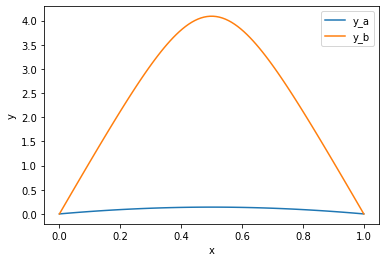

In [69]:
x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot_a, label='y_a')
plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Eigenvalue problem

Consider the set of equations:

### $$\frac{dy_1}{dt}=-5y_1+3y_2 $$

### $$\frac{dy_2}{dt}=100y_1+301y_2 $$

with initial conditions

### $$y_1(0)=52.29$$

### $$y_2(0)=83.82$$

Define a matrix to find the eigenvalues and eigenvectors

$$\begin{bmatrix}5-\lambda & -3\\-100 & 301-\lambda\end{bmatrix}\begin{Bmatrix}e_1\\e_2\end{Bmatrix}=\{0\}$$

where $\lambda$ and $\{e\}$ are the eigenvalue and eigenvector respectively.

Create matrix of values for coeffients in $a$, then solve for the eigenvalues.

In [96]:
a = np.matrix([[5,-3],[-100,301]])
[d,v]=np.linalg.eig(a)

### The eigenvalues are

In [97]:
d

array([  3.98993323, 302.01006677])

### The eigenvectors are

In [98]:
v

matrix([[-0.94772493,  0.01010015],
        [-0.31908849, -0.99994899]])

This would generate the general solutions as follows:

### $$y_1=c_{11}e^{-3.9899t}+c_{12}e^{-302.0101t}$$

### $$y_1=c_{21}e^{-3.9899t}+c_{22}e^{-302.0101t}$$

we can then solve using the initial conditions at $t=0$

### $$e^{0}=1$$

therefore

### $$y_1(0)=52.29=c_{11}+c_{12}$$

### $$y_2(0)=83.82=c_{21}+c_{22}$$

We can find the coeffients with the eigenvalues and eigenvectors with the initial conditions

In [136]:
c = np.matrix([[52.29],[83.82]])
cc = np.linalg.inv(v)*c
c11 = cc[0]*v[0,0]
c11

matrix([[52.95654426]])

In [137]:
c21 = cc[0]*v[1,0]
c21

matrix([[17.82988194]])

In [138]:
c12 = cc[1]*v[0,1]
c12

matrix([[-0.66654426]])

In [139]:
c22 = cc[1]*v[1,1]
c22

matrix([[65.99011806]])

Therefore the solution is 

### $$y_1=52.96e^{-3.9899t}+0.67e^{-302.0101t}$$

### $$y_1=17.83e^{-3.9899t}+65.99e^{-302.0101t}$$

# Homework 

## Try to use the Secant method to solve this problem. Use the PDF for guidance and try to repurpose its code.

$$\frac{d^2y}{dx^2}-2y=8x(9-x)$$

$$y(0)=0, \space \space \space \space y(9)=0$$

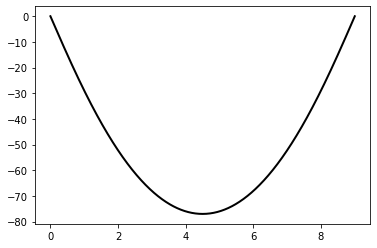

In [13]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# y'' +4y = -9sin(x), y(0) = 1., y(3*pi/4.) = -(1.+3*sqrt(2))/2., y'(0) = -2 # Exact Solution: y(x) = cos(2x) + (1/2)sin(2x) - 3sin(x)

def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 1
    i=0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 =  t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print ('t not found')
    return t2
                              
def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], 2*y[0]+8*x*(9-x)])

X= np.linspace(0,9,1000)
Y = solveSecant(ode,X,0,9,0,0,-1,1,40)
                            
plt.plot(X,Y,'-k',linewidth=2) 
plt.show()